# COLECTING INFORMATION ON **COP26** FROM BRAZILIAN WEBSITE **G1** AND SHOWING AS A WORD CLOUD


The 2021 Conference of  (COP 26) is happening from 31th of October to 12h of November. It aggregates the countries that have signed the UN Framework Convention of Climate Change (UNFCCC) and bring together several countries' leaders to address climate change. 

Regarding the event's size, this project aims to use web scrapping to get information around the conference and plot as a word cloud. 

The source of our information is the g1 portal, an important Brazilian news website.                      

# The Libraries 

We are using selenium and beautifulSoup to collect data from G1. Then, the first step is to import the required libraries.


In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import requests
from bs4 import BeautifulSoup

# Reading the website

To cut some steps, we are retrieving data from the search result page in G1 (https://g1.globo.com/busca/?q=COP+26)


In [33]:
url = 'https://g1.globo.com/busca/?q=COP+26' # The url we are using to access


Then, let's set up the option to prevent google from opening while the code is running.

In [34]:
option = Options() 
option.headless = True 

You can use several browsers with selenium. In this project, we are using Google Chrome. 

To download your driver, click here: https://chromedriver.chromium.org/downloads 

Do not forget to find the correct version (according to your system and number).

In [35]:
driver = webdriver.Chrome('C:/Users/maria/Documents/portfolio/Untitled Folder/chromedriver', options=option)
driver.get(url)

As the page loads with more news and interests us, we use 'execute_script' to scroll the page and show more.

In [36]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10) #Waiting to have all data loaded

# Finding the content

Selenium works by retrieving data from webpage source code. To get the code, use Ctrl + U in google chrome.

Find the tag where the content (title and summary) of the data we want to analyze is. 

In this project, the element of the html is 'content'. Get the HTML using function get_attribute.

Finally, after quitting the browser,  Beautifulsoup converts the HTML to a better structure to manage the information. 

In [37]:
element = driver.find_element_by_id("content")
html = element.get_attribute('outerHTML')
print(element)
html = element.get_attribute('outerHTML')
driver.quit() #closes the browser 

soup = BeautifulSoup(html, 'lxml') #Interpretando o html

<selenium.webdriver.remote.webelement.WebElement (session="4db1cd449be3beec4dc80cd1815024b6", element="08fd08af-a48c-4c23-9714-8bd040e7b862")>


# Title and summary

We use the title (in widget--info__title product-color) and the summary (in widget--info__description) to create our database and store in 'texto'.

In [38]:
texto = []

for bloco in soup.find_all(class_='widget--info__text-container'):
    #print(bloco)
    for href in bloco.find_all('a'):
        titulo = href.find(class_="widget--info__title product-color")
        if(titulo != None):
            print('titulo',titulo.text[7:-2])
            texto.append(titulo.text[7:-2])
        resumo = href.find(class_="widget--info__description")
        if(resumo != None):
            texto.append(resumo.text)
texto = ' '.join(texto)
print(texto)

titulo   Com saída de cena de políticos, COP 26 se volta ao financiamento de U$ 100 trilhões
    
titulo   COP-26 debate financiamento do combate às mudanças climáticas
    
titulo   Ibama apresenta ações de proteção ambiental no evento Espaço Brasil na COP 26
    
titulo   Participantes da COP 26 discutem alternativas para reduzir a emissão de poluentes
    
titulo   Destruição da floresta aumenta no governo Bolsonaro apesar da meta assumida na Cop-26
    
titulo   Entenda porque a Cop 26 é importante
    
titulo   Pavilhão Brasil é inaugurado na COP 26
    
titulo   COP-26: Países concordam em reduzir emissão do gás metano e acabar com desmatamento
    
titulo   Indígena brasileira discursa na COP-26, em Glasgow
    
titulo   Txai Suruí, ativista de 24 anos, faz discurso na abertura da COP-26
    
titulo   Cop 26: Brasil apoia declaração assinada por outros 104 países para combater desmatamento
    
titulo   Avanços tímidos no G20 esvaziam expectativas para a COP 26
    
titulo   Min

# The word cloud 

Now that we have the information from G1, let's show the word cloud according to the frequency of terms.

In this case, we have to cut the text into words (.split), convert them to lower caption (.lower), and remove pronouns, articles, and other common words to every text (the stop words)

In [39]:
import nltk

stopwords = nltk.corpus.stopwords.words('portuguese') + ['cop']
comment_words = ''

tokens = texto.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

# The plot 
 
To draw according to the theme, we use a mask as a baseline of the word cloud.
 
The word cloud is created using the function WordCLoud. We can easily remove stopwords, decide the background color, among other attributes within the function. 
 
Matplotlib is used to draw the image.

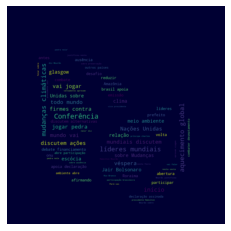

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#from PIL import Imagenltk.download('stopwords')
from wordcloud import WordCloud

mask = np.array(Image.open('C:/Users/maria/Documents/portfolio/Untitled Folder/mask.png'))

wordcloud = WordCloud(mask = mask, margin = 10,
                background_color ='rgb(0, 0, 51)',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


default_colors = wordcloud.to_array()
plt.figure()
plt.imshow(default_colors, interpolation="bilinear")
wordcloud.to_file("wordcloud.png")
plt.axis("off")
plt.show()




One interesting sentence found in the cloud is 'jogar pedra' (throw rock).

Looking for this news, we found the link: https://g1.globo.com/politica/noticia/2021/10/29/vai-chegar-em-um-lugar-em-que-todo-mundo-vai-jogar-pedra-nele-diz-mourao-sobre-ausencia-de-bolsonaro-na-cop-26.ghtml.

The news shows the vice president of Brazil, Hamilton Mourão, trying to justify the absence of president Jair Bolsonaro in COP 26.

"We know that President Bolsonaro suffers a lot of criticism. So, he will reach a place where everyone will throw stones at him. There is a strong team there with the capacity to, let's say, carry out the negotiation strategy," said Mourão.
